In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
student_data = pd.read_csv("student-por.csv", skipinitialspace = True, sep = ";")

In [3]:
student_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


## Give at least one way that you can pivot the dataset to get a slightly different representation of some values
## Explain what this is and how you would use it for a visualization.

In [4]:
temp = student_data[['school', 'sex', 'absences']]
absent = temp[temp['absences'] >= 0].groupby(['school','sex']).mean()
absent = absent.reset_index()
absent

,school,sex,absences
0,GP,F,4.405063
1,GP,M,3.973118
2,MS,F,2.232877
3,MS,M,3.325000


In [5]:
absent.pivot(index='school',columns='sex',values='absences')

sex,F,M
school,,
GP,4.405063,3.973118
MS,2.232877,3.325000


The above pivot example represents the average absences a Male or Female has based on which school they go to. This is something a school system might use for report purposes. This shows that in both cases, Females tend to miss more school than males. It is important to keep in mind, there are more results for one school than the other, so using direct counts of data will not be as accurate. 

## H) Identify any possible relationships between features included in the data: which ones are likely to affect others?

Text(0, 0.5, 'Number of absences')

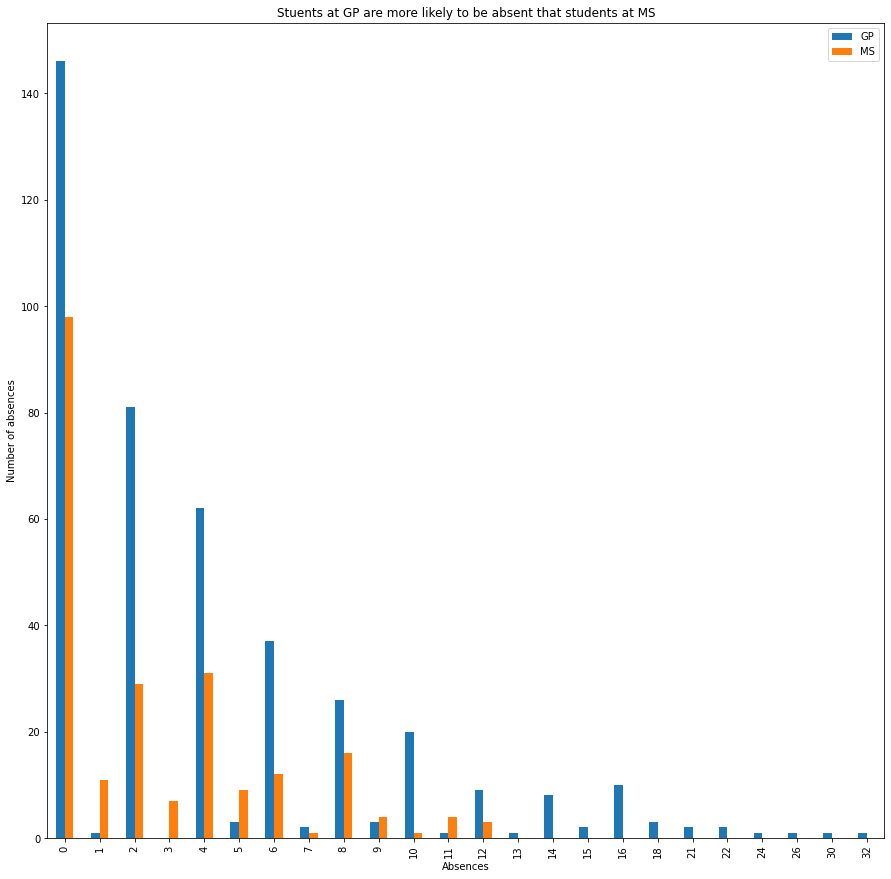

In [6]:
#Which school has a higher attendance rate?
temp = student_data[['school', 'absences']]
le3 = temp[temp['school'] == 'GP'].groupby('absences').count()
gt3 = temp[temp['school'] == 'MS'].groupby('absences').count()
combined = pd.concat((le3, gt3), axis=1)
combined.plot.bar(figsize = (15,15))
plt.legend(['GP','MS'])
plt.title("Stuents at GP are more likely to be absent that students at MS")
plt.xlabel("Absences")
plt.ylabel("Number of absences")

We would need to factor in the number of students at GP is greater than the number of students at MS therefore the numbers in this graph are likely to be skewed in GP's favor. However based on the data given, most of the data comparissons are still able to display the trend that students at GP are more likely to be absent than MS. Using percentages of total student population is important to remember. It is possible to hypothesis other data based on the absences for example: The grades of students at GP are lower than those of MS. This is only a hypothesis though because we have no data of the students' grades but knowing that if a student is not showing up to class, they are more likely to have a lower grade from not completing assignments or missing tests is a reasonable conclusion to come to.

## What “extra” features can you perhaps compute from the data?
One possible feature that could be computed from the data would be the idea that parents with certain jobs are more likely to have kids with better/worse attendance. For example: A couple with a "Stay at home" parent would be more likely to have a student with better attendance.

Another feature is showing what types of jobs a certain type of household is likely to have. Urban households might have more services or at home jobs, while a Rural household might have more teachers living there.

Again, these are all projections based on the data provided that even with combining are not completely reliable due to certain outliers in families and the fact that one school has more students enrolled.